# SMART PLUG PROJECT
## 0. Introducción
El proyecto Smart Plug del módulo Digital Energy impartido en el Master Smart Energy de CITCEA, tiene como objetivo principal estudiar y llevar a cabo una gestión activa de una carga doméstica en la medida de lo posible. La finalidad del proyecto es aprofundizar en los conocimientos adquiridos a lo largo del curso.

A continuación se definen los puntos sobre los que se va a intentar trabajar a lo largo del desarrollo del proyecto:

    1) Definición de la carga objeto de estudio.
    2) Montaje y puesta en marcha del sistema de adquisición de datos.
    3) Programación del código en C++ para el volcado en Arduino y la adquisición de datos.
    4) Lectura de datos del Arduino y generación de un csv mediante script Python.
    5) Análisis energético de los datos recogidos, comparación de escenarios y recomendaciones de uso. 
    6) Solicitud y adquisición de los precios eléctricos a traves de la API REE mediante protocolo HTTP.
    7) Análisis económico de los datos recogidos, impacto anual y comparación de escenarios.
    8) Desarrollo de un algoritmo para la optimización del uso de la carga según consignas de precios de mercado.

## 1. Definición de la carga
Se ha escogido el lavavajillas como caso de estudio. Su potencia de consumo elevada y la flexibilidad que ofrece hacen que el análisis de consumo energético y del impacto económico sea interesante. 

Se pretende analizar diferentes programas y compararlos, jugar con temperaturas, duración y velocidad de lavado. El objetivo es encontrar relaciones entre los parámetros programables y el consumo energético del equipo para entender su funcionamiento y poder conseguir un ahorro energético. Por otro lado, se va a analizar el precio de mercado eléctrico mediante la API de REE para encontrar el momento óptimo de encendido del equipo. Mediante el desplazamiento de la carga se pretende minimizar su impacto económico en la factura eléctrica.

El electrodoméstico en cuestión es un lavavajillas de la marca Siemens, modelo SN215I01CE con clase de eficiencia energética A++. La etiqueta energética es un indicador de la eficiencia energética del equipo que se asigna para poder comparar productos de las mismas características y de diferentes marcas, en lo referente a los consumos de energía y otros parámetros relacionados. La clase energética A++ indica un consumo inferior al 30%, representando el 100% el consumo de los equipos menos eficientes. 
 
El modelo de lavavajillas escogido tiene una potencia nominal de 2000-2400W y una corriente nominal de 10-16A. A continuación se muestra su cuadro de programas y funcionalidades adicionales, extraído de la hoja de características técnicas del fabricante.

<img src="./data/Fig1.png">
<img src="./data/Fig2.png">
<img src="./data/Fig3.png">

### 1.1. Definición de escenarios
Se considera de interés registrar los datos de consumo del lavado ECO, por ser el programa utilizado habitualmente por el usuario de la carga. Mediante el sistema de adquisición de datos se puede estudiar el perfil de consumo del ciclo de lavado.

Adicionalmente se van a registrar los consumos de otros programas de lavado, con la finalidad de hacer una comparación de escenarios y extraer conclusiones. Tras estudiar la ficha técnica del equipo y ver los programas disponibles, se considera de interés comparar el programa ECO con el programa AUTOMÁTICO, además se va a programar un lavado AUTOMÁTICO con la función adicional 'media carga' y otro con la función adicional 'menos tiempo'.


## 2. Sistema de adquisición de datos
En este apartado, se describe el sistema de adquisición de datos utilizado y se muestra un reportaje fotográfico para un mejor entendicmiento del montaje del mismo.

El sistema de adquisición de datos se compone principalmente de una pinza amperimétrica, un enchufe inteligente, un pequeño circuito eléctrico, un microcontrolador arduino y un PC. Además de los accesorios eléctricos necesarios para la integración de todos de todos estos elementos en un único sistema de adquisición de datos.

El montaje y puesta en marcha del sistema se realiza según el esquema que se muestra a continuación:

<img src="./data/Asemb1.png">

El relé es un componente adicional no necesario para la adquisición de datos pero que puede ser de interés para futuras aplicaciones de gestión y control de la carga de una manera más automatizada e inteligente.

La pinza amperimétrica medirá la tensión de cualquiera de las fases y se conectará al circuito eléctrico y al microcontrolador según el siguiente esquemático:

<img src="./data/Asemb2.png">
<img src="./data/Asemb3.png">

Por último, quedará conectar el Arduino puerto USB del PC mediante cable; para la transferencia de datos desde la pinza amperimétrica hasta el PC pasando por el microcontrolador.

A continuación se adjunta un pequeño reportaje fotográfico del montaje:

<img src="./data/Mont1.jpg">
<img src="./data/Mont3.jpg">
<img src="./data/Mont2.jpg">
<img src="./data/Mont4.jpg">
<img src="./data/Mont5.jpg">
<img src="./data/Mont6.jpg">
<img src="./data/Mont7.jpg">
<img src="./data/Mont8.jpg">
<img src="./data/Mont9.jpg">
<img src="./data/Mont10.jpg">

### 2.1 Código Arduino C++
Para el correcto funcionamiento del sistema de adquisición de datos, hay que programar el microcontrolador en lenguaje C++. Mediante la ejecución del código de programación, el arduino procesa los datos de entrada,  realiza las operaciones necesarias y transfiere los valores deseados hacia el puerto USB.

A continuación se explica detalladamente el desarrollo del código:

#### Definición de variables.
En primer lugar se define la resistencia interna de la pinza amperimétrica (33Ω) y las entradas analógicas utilizadas en el micro controlador Arduino como valores constantes (A0, A2). Adicionalmente se definen un conjunto de variables auxiliares que serán de utilidad para recorrer vectores o determinar saltos de paso.

Por último, se define el valor de frecuencia de la red como constante a 50Hz, la relación de reducción del transformador como 1.000 y se inicializa el valor de corriente eficaz a 0A.

#### Inicialización.
A continuación se inicializa el puerto de comunicaciones con un baudrate de 115.200 bit/s. Esta línea de comando nos determina la velocidad de transferencia de bits.

#### Core del código.
El código principal trabaja dentro de un bucle que se ejecuta de forma continuada. 
Mediante una función condicional, se leen los valores de las entradas analógicas donde se conecta el sensor de corriente cada milisegundo. Con las lecturas del sensor se calculan los valores de diferencia de tensión y corriente instantánea para cada milisegundo. Seguidamente, se calcula el acumulado de la corriente instantánea al cuadrado multiplicada por su rango discreto (0,001s) y se guarda en la variable ‘rawSquaredSum’, además se activa un contador ‘count_integral’; estas líneas de comando se ejecutan cada milisegundo.   
A partir de estos datos, se utiliza otra función condicional para calcular el valor de corriente eficaz promediada en cada periodo (cada 20ms) mediante la aproximación en forma discreta de la integral de corriente en el tiempo continuo. Tras la obtención del Irms para un periodo dado, se reinician las variables ‘count_integral’ y ‘rawSquaredSum’ necesarias para el cálculo del nuevo valor Irms. Además, se calcula el acumulado de corriente eficaz ‘sum1’ y se activa un contador ‘count’; estas líneas de comando se ejecutan cada 20 milisegundos.
Por último, se utiliza otra función condicional para calcular el valor de corriente eficaz promediada y potencia media de consumo cada 5 segundos gracias a la variable ‘sum1’ que contiene el acumulado y al contador ‘count’. Estos valores se imprimen por pantalla cada 5 segundos. 
Finalmente se reinician las variables ‘sum1’ y ‘count’.

### 2.2. Código CSV Python

Por último, el PC tiene que recibir los valores generados por el microcontrolador. Para eso, se crea un script en un entorno de desarrollo integrado para la compilación de Python.

El script crea la comunicación con el puerto USB donde se conecta el microcontrolador y lo relaciona a la placa arduino. Se leen los valores que va transmitiendo el arduino, se guardan en una lista y se genera un archivo csv donde se vuelcan estos datos de forma indefinida. 

Una vez iniciada la ejecución del código, el proceso debe ser interrumpido manualmente por el usuario desde el entorno de desarrollo integrado. 

## 5. Análisis energético

### 5.2. Data cleaning
En primer lugar importamos las librerías pandas, numpy, datetime y matplotlib.pyplot de python para poder trabajar con ellas a continuación y facilitarnos así el tratamiento de datos.


In [43]:
# data processing
import pandas as pd 
# numerical library 
import numpy as np
# timer, dates
import datetime
# data visualization libraries
import matplotlib.pyplot as plt 

Una vez registrados y guardados los datos de los programas seleccionados en archivos csv (mediante la ejecución del Script de python), cargamos los 4 ficheros, definimos los atributos de los dataframes y comprobamos. 

In [44]:
#Cargamos los datos del programa y comprobamos

df_ECO = pd.read_csv('./data/data_ECO.csv', sep=',')
df_AUTO=pd.read_csv('./data/data_AUTO.csv', sep=',')
df_AUTO_12=pd.read_csv('./data/data_AUTO_0,5.csv', sep=',')
df_AUTO_speed=pd.read_csv('./data/data_AUTO_speed.csv', sep=',')


df_ECO.columns=['Time','Irms_A','Prms_W']
df_AUTO.columns=['Time','Irms_A','Prms_W']
df_AUTO_12.columns=['Time','Irms_A','Prms_W']
df_AUTO_speed.columns=['Time','Irms_A','Prms_W']

df_ECO.head()
#df_AUTO.head()
#df_AUTO_12.head()
#df_AUTO_speed.head()

,Time,Irms_A,Prms_W
0,2020-07-28 16:11:09.479244,-0.01,-1.86
1,2020-07-28 16:11:14.485726,0.00,0.24
2,2020-07-28 16:11:19.489585,0.09,20.65
3,2020-07-28 16:11:24.491142,0.03,7.24
4,2020-07-28 16:11:29.496498,0.02,5.44


A continuación cambiamos el formato de la columna 'Time' a formato datatime de pandas.

In [45]:
#Cambiamos el formato de la columnas 'Time' a datetime format

df_ECO['Time']=pd.to_datetime(df_ECO['Time'], format='%Y-%m-%d %H:%M:%S')
df_AUTO['Time']=pd.to_datetime(df_AUTO['Time'], format='%Y-%m-%d %H:%M:%S')
df_AUTO_12['Time']=pd.to_datetime(df_AUTO_12['Time'], format='%Y-%m-%d %H:%M:%S')
df_AUTO_speed['Time']=pd.to_datetime(df_AUTO_speed['Time'], format='%Y-%m-%d %H:%M:%S')

print(df_ECO)
print(df_AUTO)
print(df_AUTO_12)
print(df_AUTO_speed)

                           Time  Irms_A  Prms_W
0    2020-07-28 16:11:09.479244   -0.01   -1.86
1    2020-07-28 16:11:14.485726    0.00    0.24
2    2020-07-28 16:11:19.489585    0.09   20.65
3    2020-07-28 16:11:24.491142    0.03    7.24
4    2020-07-28 16:11:29.496498    0.02    5.44
...                         ...     ...     ...
2465 2020-07-28 19:36:43.937005   -0.07  -15.59
2466 2020-07-28 19:36:48.941946   -0.07  -15.88
2467 2020-07-28 19:36:53.946149   -0.07  -15.39
2468 2020-07-28 19:36:58.950764   -0.07  -15.83
2469 2020-07-28 19:37:03.952775   -0.07  -15.82

[2470 rows x 3 columns]
                           Time  Irms_A  Prms_W
0    2020-07-30 09:01:37.010926   -0.03   -6.12
1    2020-07-30 09:01:42.015861    0.06   14.05
2    2020-07-30 09:01:47.019907    0.06   12.81
3    2020-07-30 09:01:52.021143    0.05   10.53
4    2020-07-30 09:01:57.025495    0.01    2.04
...                         ...     ...     ...
1870 2020-07-30 11:37:33.976331   -0.07  -15.82
1871 2020-07-30

#### 5.2.1 PROGRAMA ECO
Definimos el límite inferior para los datos recogidos a 0 y realizamos el cálculo del consumo energético entre muestras para añadir el nuevo atributo 'Energy_Wh', también calculamos la energía acumulada y añadimos la columna 'Acumulated_Wh'.

In [46]:
# Cálculo preciso de la energia entre 2 muestras
df_ECO['Energy_Wh'] = 0.0
longitud = df_ECO['Energy_Wh'].size
df_ECO['Acumulated_Wh']=0.0


# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if df_ECO['Irms_A'][x] < 0.0:
        df_ECO.at[x,'Irms_A'] = 0.0
    if df_ECO['Prms_W'][x] < 0.0:
        df_ECO.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    df_ECO.at[x,'Energy_Wh'] = df_ECO['Prms_W'][x] * ((df_ECO['Time'][x]-df_ECO['Time'][x-1]).seconds/3600)
    df_ECO.at[x,'Acumulated_Wh']=df_ECO['Acumulated_Wh'][x-1]+df_ECO['Prms_W'][x] * ((df_ECO['Time'][x]-df_ECO['Time'][x-1]).seconds/3600)
    
df_ECO


,Time,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
0,2020-07-28 16:11:09.479244,0.00,0.00,0.000000,0.000000
1,2020-07-28 16:11:14.485726,0.00,0.24,0.000333,0.000333
2,2020-07-28 16:11:19.489585,0.09,20.65,0.028681,0.029014
3,2020-07-28 16:11:24.491142,0.03,7.24,0.010056,0.039069
4,2020-07-28 16:11:29.496498,0.02,5.44,0.007556,0.046625
...,...,...,...,...,...
2465,2020-07-28 19:36:43.937005,0.00,0.00,0.000000,680.535883
2466,2020-07-28 19:36:48.941946,0.00,0.00,0.000000,680.535883
2467,2020-07-28 19:36:53.946149,0.00,0.00,0.000000,680.535883
2468,2020-07-28 19:36:58.950764,0.00,0.00,0.000000,680.535883


In [47]:
# Suma de todas las energias y convertir de Wh a kWh    
Energia_ECO = 0.001 * df_ECO['Energy_Wh'].sum(axis = 0)

"La energía total consumida en el lavado ECO es de "+str(Energia_ECO.round(4))+" kWh"

'La energía total consumida en el lavado ECO es de 0.6805 kWh'

Comprobamos las dimensiones del dataframe y el tipo de dato de cada atributo. Obtenemos información de los datos con las funciones info() y describe() de pandas.

In [48]:
# Check the dataframe's shape

df_ECO.shape

(2470, 5)

In [49]:
# Check the features' types
df_ECO.dtypes

Time             datetime64[ns]
Irms_A                  float64
Prms_W                  float64
Energy_Wh               float64
Acumulated_Wh           float64
dtype: object

In [50]:
# use describe and info to develop the EDA for your dataset

In [51]:
df_ECO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2470 entries, 0 to 2469
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           2470 non-null   datetime64[ns]
 1   Irms_A         2470 non-null   float64       
 2   Prms_W         2470 non-null   float64       
 3   Energy_Wh      2470 non-null   float64       
 4   Acumulated_Wh  2470 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 96.6 KB


Con la función info() podemos ver que no hay missing values 

In [52]:
df_ECO.describe()

,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
count,2470.000000,2470.000000,2470.000000,2470.000000
mean,0.872045,200.583397,0.275521,376.250903
std,2.487807,572.200775,0.786248,224.000581
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,247.574430
50%,0.150000,33.480000,0.045840,300.398650
75%,0.320000,72.500000,0.100385,680.514814
max,9.860000,2267.870000,3.149819,680.535883


Con la función describe() podemos ver que el valor máximo de potencia es de 2.267,87W, cercano al valor de potencia nominal, también se observa que el programa ECO consume una potencia media de 200W y que la energía acumulada al final del ciclo de lavado es de 680,53 Wh. 

Por último, otro dato relevante es que más del 25% de los datos recogidos tienen valor 0, más adelante en el apartado de visualización de datos se trata este acontecimiento.  

#### 5.2.2 PROGRAMA AUTOMÁTICO
Definimos el límite inferior para los datos recogidos a 0 y realizamos el cálculo del consumo energético entre muestras para añadir el nuevo atributo 'Energy_Wh', también calculamos la energía acumulada y añadimos la columna 'Acumulated_Wh'.

In [53]:
# Cálculo preciso de la energia entre 2 muestras
df_AUTO['Energy_Wh'] = 0.0
longitud = df_AUTO['Energy_Wh'].size
df_AUTO['Acumulated_Wh']=0.0


# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if df_AUTO['Irms_A'][x] < 0.0:
        df_AUTO.at[x,'Irms_A'] = 0.0
    if df_AUTO['Prms_W'][x] < 0.0:
        df_AUTO.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    df_AUTO.at[x,'Energy_Wh'] = df_AUTO['Prms_W'][x] * ((df_AUTO['Time'][x]-df_AUTO['Time'][x-1]).seconds/3600)
    df_AUTO.at[x,'Acumulated_Wh']=df_AUTO['Acumulated_Wh'][x-1]+df_AUTO['Prms_W'][x] * ((df_AUTO['Time'][x]-df_AUTO['Time'][x-1]).seconds/3600)
    
df_AUTO

,Time,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
0,2020-07-30 09:01:37.010926,0.00,0.00,0.000000,0.000000
1,2020-07-30 09:01:42.015861,0.06,14.05,0.019514,0.019514
2,2020-07-30 09:01:47.019907,0.06,12.81,0.017792,0.037306
3,2020-07-30 09:01:52.021143,0.05,10.53,0.014625,0.051931
4,2020-07-30 09:01:57.025495,0.01,2.04,0.002833,0.054764
...,...,...,...,...,...
1870,2020-07-30 11:37:33.976331,0.00,0.00,0.000000,1038.049603
1871,2020-07-30 11:37:38.981648,0.00,0.00,0.000000,1038.049603
1872,2020-07-30 11:37:43.988257,0.00,0.00,0.000000,1038.049603
1873,2020-07-30 11:37:48.987111,0.00,0.00,0.000000,1038.049603


In [54]:
# Suma de todas las energias y convertir de Wh a kWh    
Energia_AUTO = 0.001 * df_AUTO['Energy_Wh'].sum(axis = 0)

"La energía total consumida en el lavado AUTO es de "+str(Energia_AUTO.round(4))+" kWh"

'La energía total consumida en el lavado AUTO es de 1.038 kWh'

Comprobamos las dimensiones del dataframe y el tipo de dato de cada atributo. Obtenemos información de los datos con las funciones info() y describe() de pandas.

In [55]:
# Check the dataframe's shape

df_AUTO.shape

(1875, 5)

In [56]:
# Check the features' types
df_AUTO.dtypes

Time             datetime64[ns]
Irms_A                  float64
Prms_W                  float64
Energy_Wh               float64
Acumulated_Wh           float64
dtype: object

In [57]:
# use describe and info to develop the EDA for your dataset

In [58]:
df_AUTO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1875 entries, 0 to 1874
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           1875 non-null   datetime64[ns]
 1   Irms_A         1875 non-null   float64       
 2   Prms_W         1875 non-null   float64       
 3   Energy_Wh      1875 non-null   float64       
 4   Acumulated_Wh  1875 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 73.4 KB


Con la función info() podemos ver que no hay missing values 

In [59]:
df_AUTO.describe()

,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
count,1875.000000,1875.000000,1875.000000,1875.000000
mean,1.745573,401.485739,0.553626,653.098197
std,3.482993,801.083255,1.105975,292.499680
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,455.676954
50%,0.250000,57.080000,0.079028,653.583114
75%,0.460000,105.015000,0.134743,1015.038714
max,9.860000,2266.770000,3.148292,1038.049603


Con la función describe() podemos ver que el valor máximo de potencia es de 2.266,77W, cercano al valor de potencia nominal, también se observa que el programa AUTO consume una potencia media de 401W y que la energía acumulada al final del ciclo de lavado es de 1.038,05 Wh. 

Por último, otro dato relevante es que más del 25% de los datos recogidos tienen valor 0, más adelante en el apartado de visualización de datos se trata este acontecimiento.  

#### 5.2.3 PROGRAMA AUTOMÁTICO A MEDIA CARGA
Definimos el límite inferior para los datos recogidos a 0 y realizamos el cálculo del consumo energético entre muestras para añadir el nuevo atributo 'Energy_Wh', también calculamos la energía acumulada y añadimos la columna 'Acumulated_Wh'.

In [60]:
# Cálculo preciso de la energia entre 2 muestras
df_AUTO_12['Energy_Wh'] = 0.0
longitud = df_AUTO_12['Energy_Wh'].size
df_AUTO_12['Acumulated_Wh']=0.0


# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if df_AUTO_12['Irms_A'][x] < 0.0:
        df_AUTO_12.at[x,'Irms_A'] = 0.0
    if df_AUTO_12['Prms_W'][x] < 0.0:
        df_AUTO_12.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    df_AUTO_12.at[x,'Energy_Wh'] = df_AUTO_12['Prms_W'][x] * ((df_AUTO_12['Time'][x]-df_AUTO_12['Time'][x-1]).seconds/3600)
    df_AUTO_12.at[x,'Acumulated_Wh']=df_AUTO_12['Acumulated_Wh'][x-1]+df_AUTO_12['Prms_W'][x] * ((df_AUTO_12['Time'][x]-df_AUTO_12['Time'][x-1]).seconds/3600)
    
df_AUTO_12

,Time,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
0,2020-07-28 21:22:26.318226,0.0,0.0,0.0,0.0000
1,2020-07-28 21:22:31.323387,0.0,0.0,0.0,0.0000
2,2020-07-28 21:22:36.327447,0.0,0.0,0.0,0.0000
3,2020-07-28 21:22:41.328889,0.0,0.0,0.0,0.0000
4,2020-07-28 21:22:46.334744,0.0,0.0,0.0,0.0000
...,...,...,...,...,...
1552,2020-07-28 23:31:52.059026,0.0,0.0,0.0,664.8774
1553,2020-07-28 23:31:57.061938,0.0,0.0,0.0,664.8774
1554,2020-07-28 23:32:02.065158,0.0,0.0,0.0,664.8774
1555,2020-07-28 23:32:07.069922,0.0,0.0,0.0,664.8774


In [61]:
# Suma de todas las energias y convertir de Wh a kWh    
Energia_AUTO_12 = 0.001 * df_AUTO_12['Energy_Wh'].sum(axis = 0)

"La energía total consumida en el lavado AUTO a media carga es de "+str(Energia_AUTO_12.round(4))+" kWh"

'La energía total consumida en el lavado AUTO a media carga es de 0.6649 kWh'

Obtenemos información de los datos con las funciones info() y describe() de pandas.

In [62]:
df_AUTO_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557 entries, 0 to 1556
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           1557 non-null   datetime64[ns]
 1   Irms_A         1557 non-null   float64       
 2   Prms_W         1557 non-null   float64       
 3   Energy_Wh      1557 non-null   float64       
 4   Acumulated_Wh  1557 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 60.9 KB


Con la función info() podemos ver que no hay missing values 

In [63]:
df_AUTO_12.describe()

,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
count,1557.000000,1557.000000,1557.000000,1557.000000
mean,1.340135,308.221785,0.427025,392.151606
std,3.066644,705.332545,0.977922,208.865557
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,284.652864
50%,0.200000,45.110000,0.062208,326.413233
75%,0.400000,91.980000,0.127625,664.856025
max,9.700000,2231.910000,3.099875,664.877400


Con la función describe() podemos ver que el valor máximo de potencia es de 2.231,91W, cercano al valor de potencia nominal, también se observa que el programa AUTO a media carga consume una potencia media de 308W y que la energía acumulada al final del ciclo de lavado es de 664,88 Wh. 

Por último, otro dato relevante es que más del 25% de los datos recogidos tienen valor 0, más adelante en el apartado de visualización de datos se trata este acontecimiento.  

#### 5.2.4 PROGRAMA AUTOMÁTICO ALTA VELOCIDAD
Definimos el límite inferior para los datos recogidos a 0 y realizamos el cálculo del consumo energético entre muestras para añadir el nuevo atributo 'Energy_Wh', también calculamos la energía acumulada y añadimos la columna 'Acumulated_Wh'.

In [64]:
# Cálculo preciso de la energia entre 2 muestras
df_AUTO_speed['Energy_Wh'] = 0.0
longitud = df_AUTO_speed['Energy_Wh'].size
df_AUTO_speed['Acumulated_Wh']=0.0


# Eliminar valore negativos de Corriente y Potencia
for x in range(0,longitud):
    if df_AUTO_speed['Irms_A'][x] < 0.0:
        df_AUTO_speed.at[x,'Irms_A'] = 0.0
    if df_AUTO_speed['Prms_W'][x] < 0.0:
        df_AUTO_speed.at[x,'Prms_W'] = 0.0
        
# Hacer un for entre el segundo valor del vector y el último (el primer valor tiene 0 energia al ser el primero)
for x in range(1,longitud):
    # Multiplicamos la potencia por el incremento de tiempo respecto la medición anterior (en horas)
    df_AUTO_speed.at[x,'Energy_Wh'] = df_AUTO_speed['Prms_W'][x] * ((df_AUTO_speed['Time'][x]-df_AUTO_speed['Time'][x-1]).seconds/3600)
    df_AUTO_speed.at[x,'Acumulated_Wh']=df_AUTO_speed['Acumulated_Wh'][x-1]+df_AUTO_speed['Prms_W'][x] * ((df_AUTO_speed['Time'][x]-df_AUTO_speed['Time'][x-1]).seconds/3600)
    
df_AUTO_speed


,Time,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
0,2020-07-31 14:57:16.967203,0.02,3.93,0.000000,0.000000
1,2020-07-31 14:57:21.972930,0.01,3.10,0.004306,0.004306
2,2020-07-31 14:57:26.969996,0.01,3.12,0.003467,0.007772
3,2020-07-31 14:57:31.978324,0.01,3.32,0.004611,0.012383
4,2020-07-31 14:57:36.981666,0.09,20.33,0.028236,0.040619
...,...,...,...,...,...
987,2020-07-31 16:19:35.745047,0.00,0.00,0.000000,1050.123647
988,2020-07-31 16:19:40.748237,0.00,0.00,0.000000,1050.123647
989,2020-07-31 16:19:45.751162,0.00,0.00,0.000000,1050.123647
990,2020-07-31 16:19:50.754047,0.00,0.00,0.000000,1050.123647


In [65]:
# Suma de todas las energias y convertir de Wh a kWh    
Energia_AUTO_speed = 0.001 * df_AUTO_speed['Energy_Wh'].sum(axis = 0)

"La energía total consumida en el lavado AUTO a alta velocidad es de "+str(Energia_AUTO_speed.round(4))+" kWh"

'La energía total consumida en el lavado AUTO a alta velocidad es de 1.0501 kWh'

Obtenemos información de los datos con las funciones info() y describe() de pandas.

In [66]:
df_AUTO_speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time           992 non-null    datetime64[ns]
 1   Irms_A         992 non-null    float64       
 2   Prms_W         992 non-null    float64       
 3   Energy_Wh      992 non-null    float64       
 4   Acumulated_Wh  992 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.9 KB


Con la función info() podemos ver que no hay missing values 

In [67]:
df_AUTO_speed.describe()

,Irms_A,Prms_W,Energy_Wh,Acumulated_Wh
count,992.000000,992.000000,992.000000,992.000000
mean,3.331734,766.311653,1.058592,560.845611
std,4.392870,1010.355407,1.396723,322.971549
min,0.000000,0.000000,0.000000,0.000000
25%,0.080000,18.210000,0.025292,281.228073
50%,0.390000,90.495000,0.125122,562.763472
75%,9.370000,2155.260000,2.986740,822.787626
max,9.880000,2272.210000,3.155847,1050.123647


Con la función describe() podemos ver que el valor máximo de potencia es de 2.272,21W, cercano al valor de potencia nominal, también se observa que el programa AUTO a media carga consume una potencia media de 308W y que la energía acumulada al final del ciclo de lavado es de 1.050,12 Wh. 

Por último, otro dato relevante es que cerca del 25% de los datos recogidos tienen valor 0, más adelante en el apartado de visualización de datos se trata este acontecimiento.  

### 5.3. Data visualization
A continuación se visualizan los datos recogidos de los diferentes programas de lavado. En este primer apartado se muestra el perfil de consumo de cada programa seleccionado a lo largo del tiempo.

In [68]:
# include here your graphs 

Text(0.5, 1.0, 'Programa ECO')

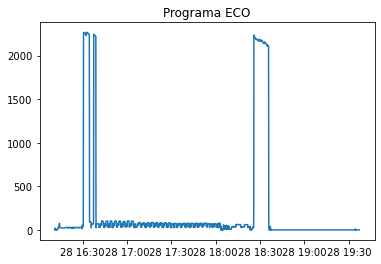

In [69]:
plt.plot(df_ECO['Time'],df_ECO['Prms_W'])
plt.title('Programa ECO')

En esta gráfica podemos ver el patrón de consumo del lavavjillas durante el lavado ECO. Pese a que en la ficha técnica del lavavajillas hemos observado que este programa de lavado presenta varias etapas (Prelavado, Lavado 50º, Aclarado intermedio,  Aclarado 65º, Secado); los principales componentes consumidores del equipo son la resistencia eléctrica para calentar el agua y la bomba eléctrica para inyectar el agua a alta velocidad mediante los aspersores.

A continuación dejo un enlace que explica el funcionamiento del lavavajillas para mejor comprensión: https://www.youtube.com/watch?v=sYTuhx10uV8

Visualizando el perfil de consumo del lavavajillas se identifica claramente cuando la resistencia entra en funcionamiento para el calentamiento del agua, así como los ciclos de funcionamiento de la bomba. La resistencia eléctrica presenta una potencia de consumo elevada, superior a los 2000W, pero trabaja solamente al inicio y al final del programa durante periodos de tiempo cortos. La bomba eléctrica presenta un consumo bajo y variable, que oscila entre los 30-100W, pero trabaja casi a lo largo de todo el programa.

Tras el último ciclo de calentamiento del agua, se observa como el equipo deja de consumir electricidad aunque no se haya terminado el programa. Seguramente esta etapa de reposo corresponde a la fase de secado donde se desagua el lavavajillas y se deja la vajilla secando, se observa un pequeño pico de potencia justo antes de terminar el programa de lavado. Ocurre lo mismo con todos los escenarios, este fenómeno se puede analizar mejor en las gáficas interactivas que se muestan más adelante.

A continuación se grafica una ampliación que muestra el ciclo de funcionamiento de la resistencia y el ciclo de funcionamiento de la bomba:

<function matplotlib.pyplot.show(*args, **kw)>

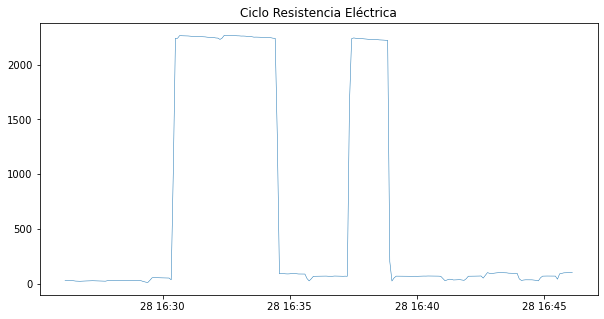

In [70]:
plt.figure(figsize=(10,5))
plt.plot(df_ECO['Time'][5*12*3:5*12*7],df_ECO['Prms_W'][5*12*3:5*12*7], linewidth=0.5)
plt.title('Ciclo Resistencia Eléctrica')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

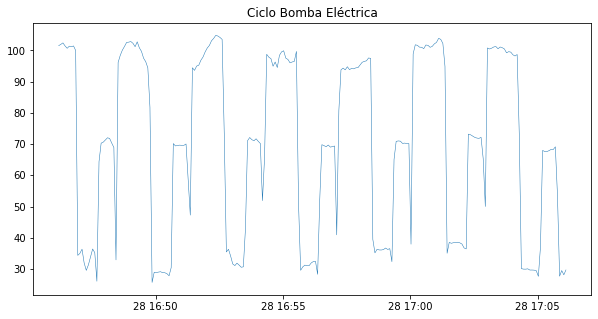

In [71]:
plt.figure(figsize=(10,5))
plt.plot(df_ECO['Time'][5*12*7:5*12*11],df_ECO['Prms_W'][5*12*7:5*12*11], linewidth=0.5)
plt.title('Ciclo Bomba Eléctrica')
plt.show

Text(0.5, 1.0, 'Programa AUTO')

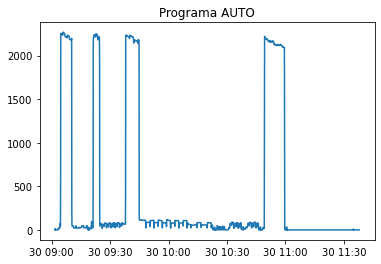

In [72]:
plt.plot(df_AUTO['Time'],df_AUTO['Prms_W'])
plt.title('Programa AUTO')

Text(0.5, 1.0, 'Programa Auto 0,5')

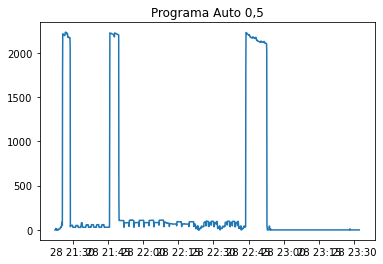

In [73]:
plt.plot(df_AUTO_12['Time'],df_AUTO_12['Prms_W'])
plt.title('Programa Auto 0,5')

Text(0.5, 1.0, 'Programa Auto Speed')

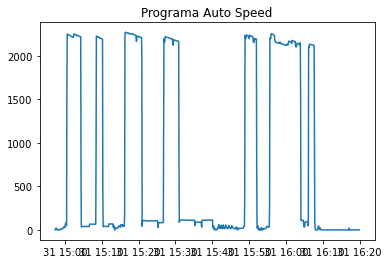

In [74]:
plt.plot(df_AUTO_speed['Time'],df_AUTO_speed['Prms_W'])
plt.title('Programa Auto Speed')

A continuación importamos las librerías plotly de python para poder visualizar gráfico interactivos.

In [75]:
# plotly library for interacive plots
import plotly.offline as py;
from plotly import tools;
import plotly.graph_objs as go;
import warnings;
from ipywidgets import widgets;
from ipywidgets import interact;

warnings.filterwarnings('ignore')
py.init_notebook_mode(connected=True)

Se utiliza la librería plotly para visualizar el perfil de potencia y la curva de energía acumulada en un solo gráfico para cada uno de los programas seleccionados.

In [76]:
# Following the guidelines on the PDF file, try to draw the interactive plot for P and Q of V52 Wind turbine.

from plotly.subplots import make_subplots

fig=go.Figure()
fig=make_subplots(specs=[[{"secondary_y": True}]])

# create a data trace for each type of meat and add them to figure one by one
fig.add_trace(go.Scatter(x=df_ECO.Time,
                         y=df_ECO.Prms_W,
                         mode='lines',
                         name='Active Power [W]'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=df_ECO.Time,
                         y=df_ECO.Acumulated_Wh,
                         mode='lines',
                         name='Energy [Wh]'),
                         secondary_y=True)

# edit the layout
fig.update_layout(title='Consumo Programa ECO',
                  xaxis_title='Time',
                  yaxis_title='Power consumption [W]')
fig.show()

In [77]:
# Following the guidelines on the PDF file, try to draw the interactive plot for P and Q of V52 Wind turbine.

from plotly.subplots import make_subplots

fig=go.Figure()
fig=make_subplots(specs=[[{"secondary_y": True}]])

# create a data trace for each type of meat and add them to figure one by one
fig.add_trace(go.Scatter(x=df_AUTO.Time,
                         y=df_AUTO.Prms_W,
                         mode='lines',
                         name='Active Power [W]'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=df_AUTO.Time,
                         y=df_AUTO.Acumulated_Wh,
                         mode='lines',
                         name='Energy [Wh]'),
                         secondary_y=True)

# edit the layout
fig.update_layout(title='Consumo Programa AUTO',
                  xaxis_title='Time',
                  yaxis_title='Power consumption [W]')
fig.show()

In [78]:
# Following the guidelines on the PDF file, try to draw the interactive plot for P and Q of V52 Wind turbine.

from plotly.subplots import make_subplots

fig=go.Figure()
fig=make_subplots(specs=[[{"secondary_y": True}]])

# create a data trace for each type of meat and add them to figure one by one
fig.add_trace(go.Scatter(x=df_AUTO_12.Time,
                         y=df_AUTO_12.Prms_W,
                         mode='lines',
                         name='Active Power [W]'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=df_AUTO_12.Time,
                         y=df_AUTO_12.Acumulated_Wh,
                         mode='lines',
                         name='Energy [Wh]'),
                         secondary_y=True)

# edit the layout
fig.update_layout(title='Consumo Programa AUTO a media carga',
                  xaxis_title='Time',
                  yaxis_title='Power consumption [W]')
fig.show()

In [79]:
# Following the guidelines on the PDF file, try to draw the interactive plot for P and Q of V52 Wind turbine.

from plotly.subplots import make_subplots

fig=go.Figure()
fig=make_subplots(specs=[[{"secondary_y": True}]])

# create a data trace for each type of meat and add them to figure one by one
fig.add_trace(go.Scatter(x=df_AUTO_speed.Time,
                         y=df_AUTO_speed.Prms_W,
                         mode='lines',
                         name='Active Power [W]'),
                         secondary_y=False)
fig.add_trace(go.Scatter(x=df_AUTO_speed.Time,
                         y=df_AUTO_speed.Acumulated_Wh,
                         mode='lines',
                         name='Energy [Wh]'),
                         secondary_y=True)

# edit the layout
fig.update_layout(title='Consumo Programa AUTO a alta velocidad',
                  xaxis_title='Time',
                  yaxis_title='Power consumption [W]')
fig.show()

Finalmente se crea un nuevo dataframe llamado 'MERGE' con los datos de potencia activa de todos los programas para hacer una última comparativa de los escenarios mediante un multiplot que represente los diferentes perfiles de carga sobre un mismo eje temporal.

In [80]:
df_MERGE=pd.DataFrame(columns=('id','ECO','AUTO','AUTO_12','AUTO_speed'))

df_MERGE['id']=np.arange(len(df_ECO['Prms_W']))
df_MERGE['ECO']=df_ECO['Prms_W']
df_MERGE['AUTO']=df_AUTO['Prms_W']
df_MERGE['AUTO_12']=df_AUTO_12['Prms_W']
df_MERGE['AUTO_speed']=df_AUTO_speed['Prms_W']

df_MERGE.fillna(0,inplace=True)

df_MERGE

,id,ECO,AUTO,AUTO_12,AUTO_speed
0,0,0.00,0.00,0.0,3.93
1,1,0.24,14.05,0.0,3.10
2,2,20.65,12.81,0.0,3.12
3,3,7.24,10.53,0.0,3.32
4,4,5.44,2.04,0.0,20.33
...,...,...,...,...,...
2465,2465,0.00,0.00,0.0,0.00
2466,2466,0.00,0.00,0.0,0.00
2467,2467,0.00,0.00,0.0,0.00
2468,2468,0.00,0.00,0.0,0.00


In [81]:
# Following the guidelines on the PDF file, try to draw the interactive plot for P and Q of V52 Wind turbine.

from plotly.subplots import make_subplots

fig = make_subplots(rows=4, cols=1)


# create a data trace for each type of meat and add them to figure one by one
fig.add_trace(go.Line(x=df_MERGE['id'],
                         y=df_MERGE['ECO'], name='Programa ECO'),row=1,col=1); 
fig.add_trace(go.Line(x=df_MERGE['id'],
                         y=df_MERGE['AUTO'], name='Programa AUTO'),row=2,col=1);            
fig.add_trace(go.Scatter(x=df_MERGE['id'],
                         y=df_MERGE['AUTO_12'], name='Programa AUTO 0,5'),row=3,col=1);
fig.add_trace(go.Scatter(x=df_MERGE['id'],
                         y=df_MERGE['AUTO_speed'], name='Programa AUTO speed'),row=4,col=1);
            

# edit the layout
fig.update_layout(autosize=False,
                  width=2000,
                  height=800,
                  title='Comparativa de programas',
                  xaxis_title='Data',
                  yaxis_title='Power consumption [W]')
fig.show()

C:\Users\Jaime\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




Comparando los diferentes programas sobre un mismo eje temporal se observa como el programa ECO es de mayor duración que el programa AUTO, sin embargo los ciclos de calentamiento de agua son menos y más cortos y eso hace que el conusmo total del programa de lavado sea un 35% inferior aproximadamente. En el programa ECO se invierte más tiempo en la inyección de agua a presión sobre la vajilla que en el calentamiento del agua, lo que lo hace más eficiente ya que la etapa de bombeo es menos exigente energéticamente hablando.

Cuando se añade la funcionalidad de media carga sobre el programa AUTO se observa una reducción de tiempo en las etapas de calentamiento y de bombeo lo que conlleva un tiempo total de lavado inferior y una reducción del consumo de un 30% aproximadamente. Hay que considerar que la capacidad de lavado en este programa es inferior y solo es efectiva si se carga el lavavajillas a la mitad.

Cuando se añade la funcionalidad de alta velocidad se reduce el tiempo de lavado a casi la mitad y la etapa de bombeo es de muy corta duración. Por contraposición, los ciclos de calentamiento de agua son más y de mayor duración lo que comporta un incremento en el consumo total, aunque bastante insignificativo.

Tras el análisis comparativo de los programas se puede concluir que el proceso de calentamiento de agua es el que mayor energía demanda por lo que la temperatura de lavado y el estado de carga del lavavajillas serán claros indicadores del consumo del ciclo de lavado. 


In [82]:
long1 = df_ECO['Time'].size-1
ECOtime=(str(df_ECO['Time'][long1]-df_ECO['Time'][0]).split())
long2 = df_AUTO['Time'].size-1
AUTOtime=(str(df_AUTO['Time'][long2]-df_AUTO['Time'][0]).split())
long3 = df_AUTO_12['Time'].size-1
AUTO12time=(str(df_AUTO_12['Time'][long3]-df_AUTO_12['Time'][0]).split())
long4 = df_AUTO_speed['Time'].size-1
AUTOspeedtime=(str(df_AUTO_speed['Time'][long4]-df_AUTO_speed['Time'][0]).split())




print("El programa de lavado ECO tiene una duración de "+ECOtime[2].split(".")[0]+"s, una potencia media de "+str(round(df_ECO['Prms_W'].mean(),2))+"W y una energía total consumida de "+str(df_ECO['Acumulated_Wh'][long1].round(2))+"Wh.")
print("El programa de lavado AUTO tiene una duración de "+AUTOtime[2].split(".")[0]+"s, una potencia media de "+str(round(df_AUTO['Prms_W'].mean(),2))+"W y una energía total consumida de "+str(df_AUTO['Acumulated_Wh'][long2].round(2))+"Wh.")
print("El programa de lavado AUTO a media carga tiene una duración de "+AUTO12time[2].split(".")[0]+"s, una potencia media de "+str(round(df_AUTO_12['Prms_W'].mean(),2))+"W y una energía total consumida de "+str(df_AUTO_12['Acumulated_Wh'][long3].round(2))+"Wh.")
print("El programa de lavado AUTO a alta velocidad tiene una duración de "+AUTOspeedtime[2].split(".")[0]+"s, una potencia media de "+str(round(df_AUTO_speed['Prms_W'].mean(),2))+"W y una energía total consumida de "+str(df_AUTO_speed['Acumulated_Wh'][long4].round(2))+"Wh.")




El programa de lavado ECO tiene una duración de 03:25:54s, una potencia media de 200.58W y una energía total consumida de 680.54Wh.
El programa de lavado AUTO tiene una duración de 02:36:16s, una potencia media de 401.49W y una energía total consumida de 1038.05Wh.
El programa de lavado AUTO a media carga tiene una duración de 02:09:45s, una potencia media de 308.22W y una energía total consumida de 664.88Wh.
El programa de lavado AUTO a alta velocidad tiene una duración de 01:22:38s, una potencia media de 766.31W y una energía total consumida de 1050.12Wh.


### 5.4 User Recomendations
Tras el análisis energético de la carga objeto de estudio, se recomienda al usuario utilizar el programa ECO tal y como era de esperar, consiguiendo así ahorros de energía superiores al 30%. Sin embargo se han obtenido otras conclusiones interesantes acerca de las funcionalidades adicionales. 

La funcionalidad de lavado a media carga reduce el tiempo de lavado y su consumo de forma notable por lo que es de interés cuando no se vaya a utilizar el lavavajillas durante unos días y la vajilla sucia sea inferior a una carga completa.

La funcionalidad de lavado a alta velocidad es interesante si hay mucha vajilla para lavar y hay que programar más de un lavado al día puesto que el tiempo de lavado se reduce a practicamente la mitad y el consumo no se incrementa en exceso.  


## 6. Solicitud datos API REE
En este apartado se muestra una herramienta útil para acceder a los precios eléctricos de mercado diario para un día concreto. Esta herramienta es interesante para determinar el impacto económico anual del equipo objeto de estudio y poder llevar a cabo un análisis económico preciso y realista.

Programando en código Python se pueden llevar a cabo peticiones a servidores web a través de APIs mediante protocolo HTTP. En este caso se utiliza la API de REE para el acceso a la base de datos y solicitud del precio diario con el método GET().

### 6.1 Código de solicitud
A continuación se muestra el código de programación para la petición de los precios eléctricos de un día en concreto (28/07/2020): 

In [83]:
import requests

URL = "https://api.esios.ree.es"
GET = "/archives_json"

HEADERS = {
    'Accept':'application/json',
    'Host':'api.esios.ree.es',
    'Authorization':'Token token=\"3627f9a1b46617055cb615ed161382e551ec7baa18466965dfd2cda3ebfc7307\"',
    'Content-Type':'application/json'}
PARAMS = {'date':'20200728'}

r=requests.get(url = URL+GET, headers=HEADERS, params=PARAMS)

print(r.status_code)
print(r.content)

200
b'{"archives":[{"id":170,"name":"IND_CoeficientesCO2","description":"IND_CoeficientesCO2","horizon":"NA","archive_type":"json","json_download":{"name":"IND_CoeficientesCO2","type":"JSON","url":"/archives/170/download_json?locale=es"},"taxonomy_terms":[],"vocabularies":[{"id_vocabulary":20,"name":"Universo"},{"id_vocabulary":21,"name":"Tem\xc3\xa1tica"},{"id_vocabulary":22,"name":"\xc3\x81rea"}]},{"id":169,"name":"IND_EnergiaAnualNacional","description":"IND_EnergiaAnualNacional","horizon":"A","archive_type":"json","json_download":{"name":"IND_EnergiaAnualNacional","type":"JSON","url":"/archives/169/download_json?locale=es"},"taxonomy_terms":[],"vocabularies":[{"id_vocabulary":20,"name":"Universo"},{"id_vocabulary":21,"name":"Tem\xc3\xa1tica"},{"id_vocabulary":22,"name":"\xc3\x81rea"}]},{"id":168,"name":"IND_EnergiaMensualNacional","description":"IND_EnergiaMensualNacional","horizon":"M","archive_type":"json","json_download":{"name":"IND_EnergiaMensualNacional","type":"JSON","url":"

In [84]:
""" Method to check if the json contains 'id' information and return 
a array with all the data """        
def getArrayOfArchives(jsonData):
    # Check the elements in the json
    for element in jsonData:
        # If there is an element called 'Id', return the element. 
        # Otherwise, return amb empty array
        if element == 'archives':
            return jsonData[element]
    return []

data = r.json()
listOfArchives = getArrayOfArchives(data)

for archives in listOfArchives:
    print(str(archives['id'])+" - "+archives['name'])


170 - IND_CoeficientesCO2
169 - IND_EnergiaAnualNacional
168 - IND_EnergiaMensualNacional
167 - IND_PotenciaInstaladaNacional
140 - IND_EnergiaAnual
139 - IND_EnergiaMensual
117 - IND_MaxMinRenovEol
116 - IND_MaxMin
115 - IND_DemandaRealGen
114 - IND_DemandaPrevProg
113 - EntitledParticipants
112 - BalanceResponsibleParties
111 - ProgrammingUnits
110 - GenerationUnits
84 - ParticipantesSubasta
83 - SujetosMercado
82 - UnidadesProgramacion
81 - UnidadesFisicas
77 - PVPC_VHC_P3_DD
76 - PVPC_VHC_P2_DD
75 - PVPC_VHC_P1_DD
74 - PVPC_NOC_P2_DD
73 - PVPC_NOC_P1_DD
72 - PVPC_GEN_P1_DD
70 - PVPC_CURV_DD
67 - IND_Umbrales
66 - IND_PrecioFinal
65 - IND_PrecioDesvios
64 - IND_PotenciaInstalada
63 - IND_Interconexiones
62 - IND_DemandaInterrumpible


In [ ]:
DATA_ID=int(input("please enter the data id: "))

for arch in r.json()['archives']:
    if arch['id'] is DATA_ID:
        GET=arch['json_download']['url']
        
print ('Getting ' +str(DATA_ID)+':'+GET)

In [86]:
r=requests.get(url=URL+GET, headers=HEADERS, params=PARAMS)

print(r.status_code)
print(r.url)
print(r.json())

200
https://api.esios.ree.es/archives_json?date=20200728
{'archives': [{'id': 170, 'name': 'IND_CoeficientesCO2', 'description': 'IND_CoeficientesCO2', 'horizon': 'NA', 'archive_type': 'json', 'json_download': {'name': 'IND_CoeficientesCO2', 'type': 'JSON', 'url': '/archives/170/download_json?locale=es'}, 'taxonomy_terms': [], 'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'}, {'id_vocabulary': 21, 'name': 'Temática'}, {'id_vocabulary': 22, 'name': 'Área'}]}, {'id': 169, 'name': 'IND_EnergiaAnualNacional', 'description': 'IND_EnergiaAnualNacional', 'horizon': 'A', 'archive_type': 'json', 'json_download': {'name': 'IND_EnergiaAnualNacional', 'type': 'JSON', 'url': '/archives/169/download_json?locale=es'}, 'taxonomy_terms': [], 'vocabularies': [{'id_vocabulary': 20, 'name': 'Universo'}, {'id_vocabulary': 21, 'name': 'Temática'}, {'id_vocabulary': 22, 'name': 'Área'}]}, {'id': 168, 'name': 'IND_EnergiaMensualNacional', 'description': 'IND_EnergiaMensualNacional', 'horizon': 'M', 

In [87]:
for arch in r.json()['PrecioFinal']:
    print('Price at'+str(arch['Hora'])+'h is : '+str(arch['NOC'])+' €/MWh')

KeyError: 'PrecioFinal'


## 7. Análisis económico
### 7.1. Impacto anual
En este apartado se analiza el impacto económico anual de la carga objeto de estudio. Para el cálculo se han considerado los hábitos de consumo del usuario, según las recomendaciones previamente dadas.

Se asume un programa de lavado diario modo ECO, el 80% de los programas en perdiodo valle y el 20% restante en periodo punta ya que el usuario suele poner el lavavajillas por la mañana para aprovechar la discriminación horaria. Se considera la tarifa eléctrica que tiene contratada el usuario (PVPC 2.0 DHA), el consumo energético registrado mediante nuestro sistema de adquisición de datos en el programa ECO (680,54 Wh) y el año 2019 para determinar el precio eléctrico promedio.  

Se utiliza la herramienta LUMIOS de REE, que nos facilita el cálculo:


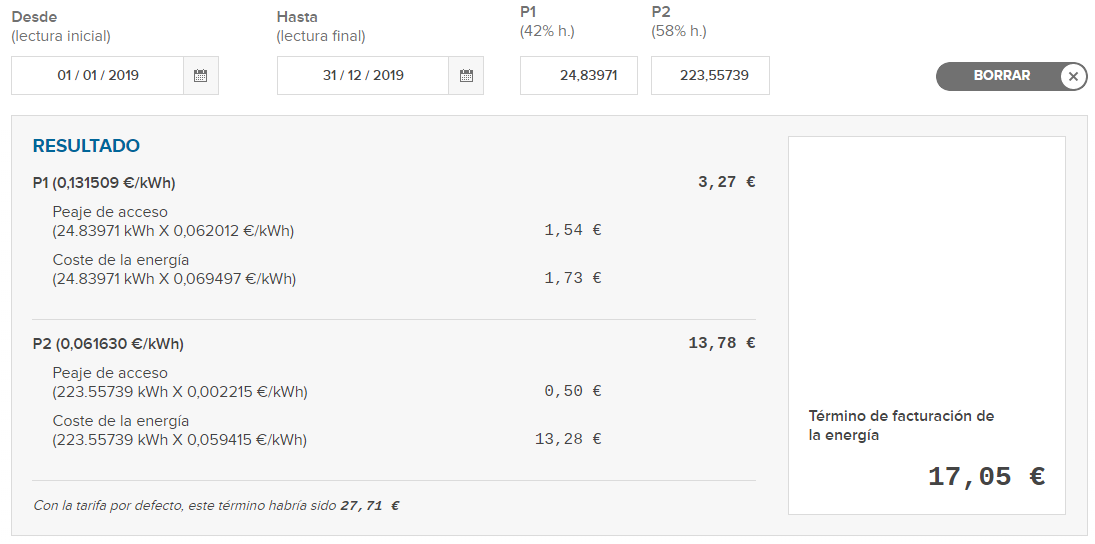



In [ ]:
'Aplicando el impuesto eléctrico y el IVA, obtenemos el impacto económico anual de nuestro lavavajillas de '+str(round(17.05*1.21*1.051127,2))+'€'

### 7.2. Comparativa de tarifa y hábitos de consumo
En este apartado se calcula el impacto económico anual de la misma carga si no se siguen las recomendaciones de uso y no se tiene contratada una tarifa eléctrica adecuada.

Se considera el mismo número de lavados pero en este caso en modo AUTO (1038,05 Wh). Además, se considera una tarifa eléctrica sin discriminación horaria.

Volemos a utilizar la herramienta LUMIOS de REE para el cálculo:

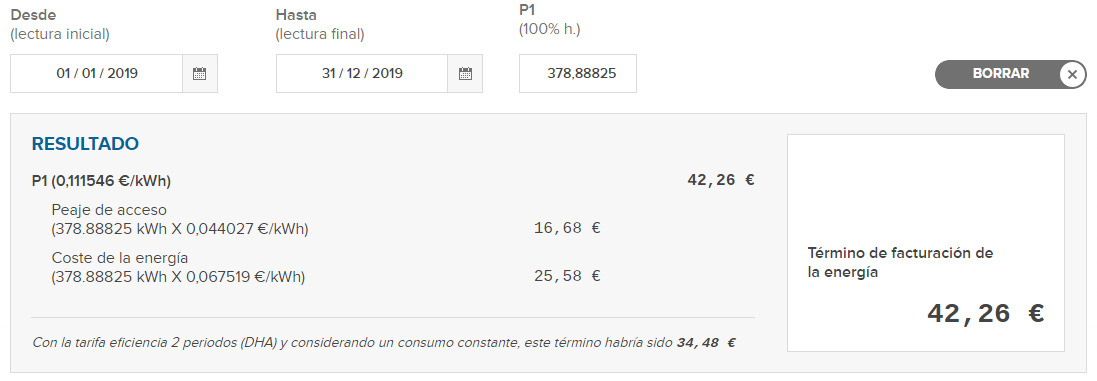




In [88]:
'Aplicando el impuesto eléctrico y el IVA, obtenemos el impacto económico anual de nuestro lavavajillas de '+str(round(42.26*1.21*1.051127,2))+'€'

'Aplicando el impuesto eléctrico y el IVA, obtenemos el impacto económico anual de nuestro lavavajillas de 53.75€'

Con esta comparativa se refleja la importancia que tiene hacer un buen uso de este tipo de equipos y aprovechar la discriminación horaria de la tarifa eléctrica. Siguiendo las recomendaciones de uso y con una tarifa adecuada se puede reducir a la mitad el impacto económico del lavavajillas.

Este estudio y las conclusiones extraídas son extrapolables a otras cargas similares como la lavadora, un circuito de riego u otras cargas desplazables.


## 8. Algoritmo de optimización
Este apartado queda fuera del alcance del proyecto, por falta de tiempo y conocimientos de programación. Aquí sería interesante desarrollar un algoritmo de optimización para la activación/desactivación de la carga según indicadores de precio e integrarlo en nuestro microcontrolador.

Para el caso de estudio, podría tener sentido acceder a la base de datos de REE cada día tras la publicación de precios del día siguiente y desconectar el equipo durante el periodo punta. Para ello se tendría que desarrollar un código que recogiera los precios horarios de mercado solicitados y cambiara el estado del relé a abierto desde (ip-3) hasta fp, siendo ip el inicio del periodo punta y fp el final del periodo punta.De este modo, evitas que el lavavajillas trabaje dentro del periodo punta ya que ningún programa de lavado es superior a 3h.

Con este algoritmo, el usuario no puede encender el programa de lavado cuando el circuito está abierto y se consigue un ahorro económico anual extra al desplazar el 100% de los lavados al periodo valle.
